<div style="border-radius:10px; padding: 15px; background-color: #000; font-size:120%; text-align:left">

# <h1 align="left"><font color=orange>Machine Learning-based Breast Cancer Prediction:</font></h1>

Breast cancer represents one of the diseases that make a high number of deaths every year. It is the most common type of all cancers and the main cause of women's deaths worldwide.

The details of cell nuclei taken from breast mass is provided and the job is to predict whether the breast mass is "Benign or Malignant".

<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [1]:
#[Data Transformation]
import pandas as pd
import numpy as np

#[Data Visualization]
import matplotlib.pyplot as plt
import seaborn as sns

#[Pre-processing]
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # tune up model

#[Balance data]
from imblearn.over_sampling import SMOTE

#[Model]
from sklearn.model_selection import train_test_split    
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#[Metrics]
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

#[Algorithm]
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#[Functions]
import pickle
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Load Data</p>

In [2]:
# Read data using pandas
df = pd.read_csv("Data/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


|__Column__| Description|
| :--- |:--- |
|__radius__| Mean of distances from center to points on the perimeter|
|__texture__| Standard deviation of gray-scale values|
|__perimeter__| Observed perimeter of the lump|
|__area__| Observed area of lump|
|__smoothness__| Local variation in radius lengths
|__compactness__| perimeter^2 / area - 1.0|
|__concavity__| Severity of concave portions of the contour|
|__concave points__| number of concave portions of the contour|
|__symmetry__| Lump symmetry|
|__fractal dimension__| "coastline approximation" - 1|
|__Diagnosis__| Whether the patient has cancer or not? ('Malignant','Benign')|


<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Data Preparation</p>

In [91]:
# How much data
df.shape

(569, 32)

In [92]:
# basic information about the dataset
# Checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [93]:
# Get the summary statistics for numerical variables
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [94]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [95]:
# Check for missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [96]:
len(df["id"].unique())

569

In [4]:
df.duplicated().sum()

0

**Inference:**
- **Number of Entries:** The dataset consists of **569** rows and **32** columns.
- **Data types:** The dataset mostly consists of **float64** except for "id" as **int64** and "diagnosis" as **object**.
- **Missing values:** There don't appear to be any missing values in the dataset as each column has 569 non-null values.
- **Features:** All the features are of continous numerical type except "diagnosis" which needs to be encoded.
- "id" feature has complete unique values which cannot be of much use to the model and hence can be removed.
- There is no duplications found in the dataset.

## 3.1 Feature Selection
Irrelevant Features Removal 

In [97]:
# Drop columns
df.drop(columns=["id"], inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3.2 Encoding
Categorical variables cannot be directly processed by machine learning models. To address this, we use encoding techniques to convert categorical data into numerical form.

In [98]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

The *"diagnosis"* column needs to be transformed into numerical values to be compatible with machine learning algorithms. We'll use the `map` method to specifically encode "Benign" and "Malignant" values to distinct numerical labels, highlighting their importance in predicting future outcomes.

In [99]:
# Convert categorical data into numerical data - using map methods
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B':1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3.3 Skewness
Skewness is a measure of the asymmetry of a distribution. 
 - -0.5 to 0.4 => Fairly symmetrical
 - -1 to -0.5 & 0.5 to +1 => Moderately symmetrical
 - Greater than -1 or +1 => Highly skewed

In [28]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
continuous_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [30]:
# Measure skewness in the numerical features
numerical_features = df[continuous_features]  
skewness = numerical_features.skew()
print(skewness)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

## 3.4 Outliers
An outlier is a single data point that goes far outside the average value of a group of statistics.

In [ ]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

In [39]:
def remove_outliers(df):
    """Interquartile Range (IQR) method based outlier removal"""
    for column in df.select_dtypes(include="number").columns:
        percentile25 = df[column].quantile(0.25) # Q1
        percentile75 = df[column].quantile(0.75) # Q3
        iqr = percentile75-percentile25
        upper_lt = percentile75 + 1.5*iqr
        lower_lt = percentile25 - 1.5*iqr
        df[column] = df[column].clip(lower_lt, upper_lt)
    return df

In [40]:
df = remove_outliers(df)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,0,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,0,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,0,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [41]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [100]:
# Save the data
df.to_csv('Data/processed_data1.csv', index=False)

<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

Exploratory data analysis (EDA) is to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

## 4.1 Class Distribution

Diagnosis count of 1 (Benign) and 0 (Malignant):
 1    357
0    212
Name: diagnosis, dtype: int64


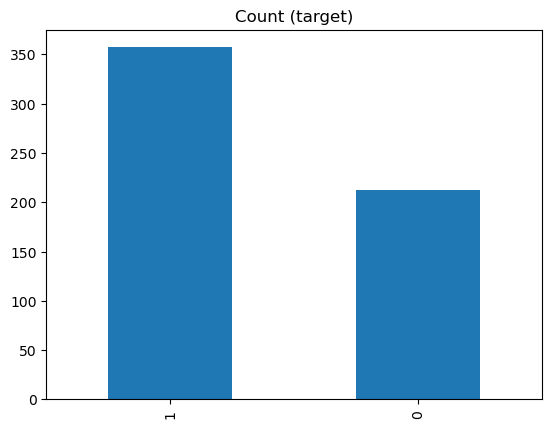

In [20]:
# print the number of diagnosis count
print('Diagnosis count of 1 (Benign) and 0 (Malignant):\n', df['diagnosis'].value_counts())

# plot the count
df['diagnosis'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [21]:
# Cancerous gland vs diagnosis

feature_list = list(df.columns[1:11])

df_M=df[df['diagnosis'] ==0]
df_B=df[df['diagnosis'] ==1]

In [22]:
feature_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

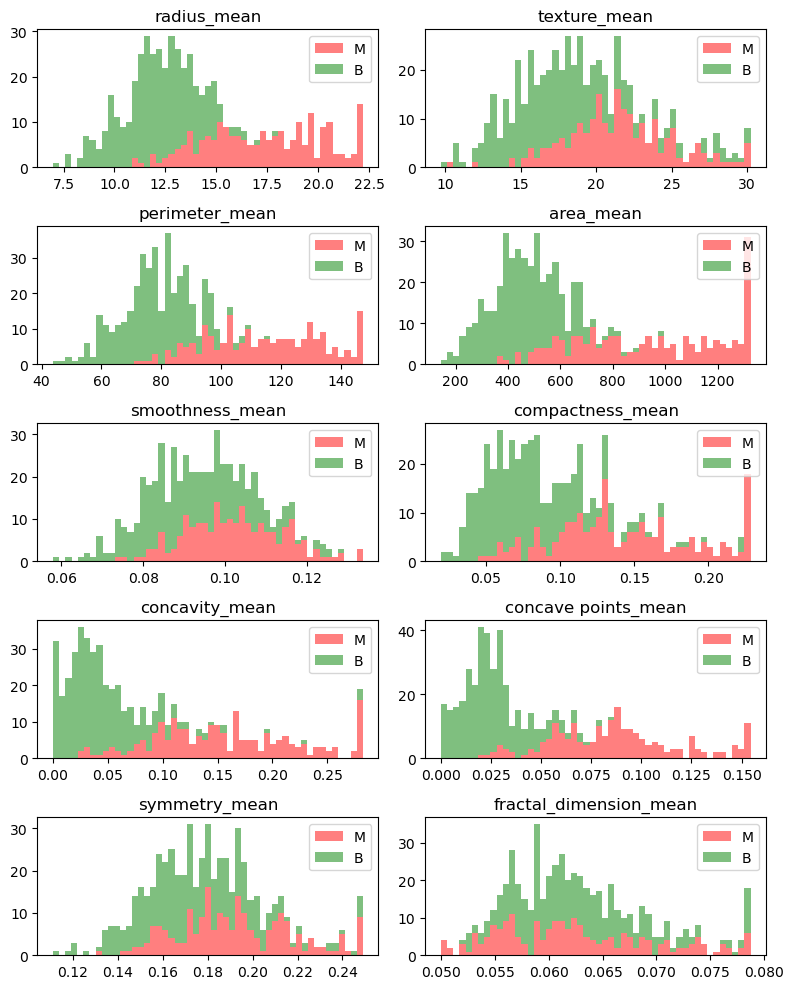

In [23]:
# change the font size for all text in figure
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))

# converts the 2D array of axes to a 1D array so that they can be easily traversed in a loop.
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[feature_list[idx]]) - min(df[feature_list[idx]]))/50
    ax.hist([df_M[feature_list[idx]],df_B[feature_list[idx]]],
            bins=np.arange(min(df[feature_list[idx]]),
                           max(df[feature_list[idx]]) + binwidth, binwidth) ,
            alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(feature_list[idx])
plt.tight_layout()
plt.show()

## 4.2 Correlation Analysis

<AxesSubplot:>

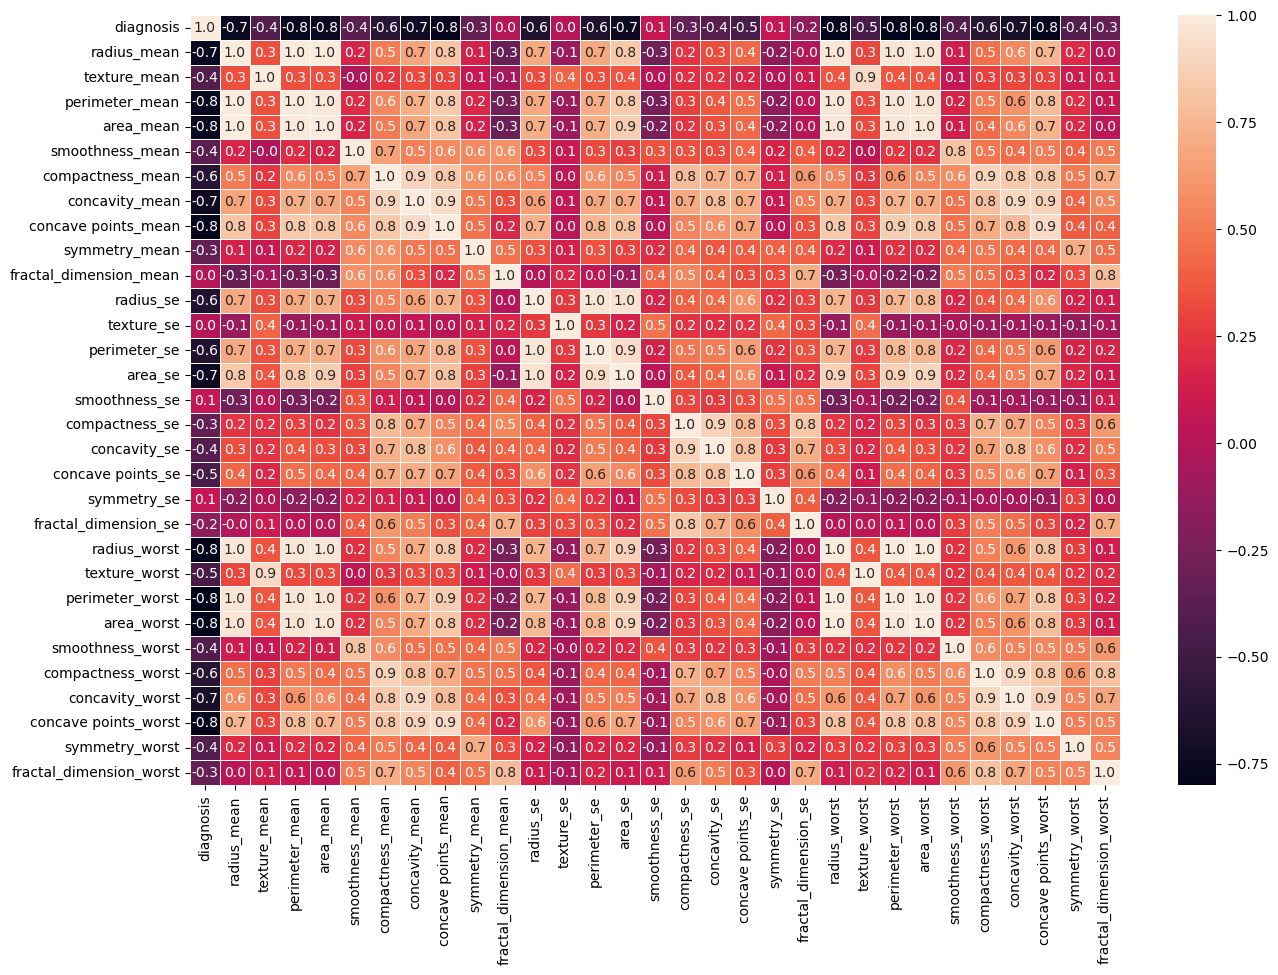

In [24]:
f,ax=plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Model</p>

To classify the diagnosis with Random Forest, Support Vector Machine, Logistic Regression and PCA methods and study the performance.

## 5.1 RF
Random forest is a machine learning algorithm that belongs to the supervised learning technique. It is based on the concept of **ensemble** learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Random Forest is a classifier that contains a number of **decision trees** on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [2]:
df2 = pd.read_csv("Data/processed_data.csv")
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,0,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,0,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,0,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [3]:
# Define the features (x) and the output labels (y)
x = df2.drop('diagnosis', axis=1)
y = df2['diagnosis'] 

smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x, y)

In [4]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [5]:
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.00000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,14.716540,19.782147,96.080168,700.420269,0.096708,0.109922,0.099433,0.055350,0.182376,0.062427,...,17.135201,26.410095,113.216640,949.464858,0.13359,0.270748,0.301761,0.126571,0.292573,0.084396
std,3.505266,4.098102,24.180994,324.378620,0.013087,0.050207,0.075584,0.039052,0.024675,0.006271,...,4.861273,5.902970,33.742352,509.329069,0.02209,0.144238,0.198337,0.066628,0.053666,0.015969
min,7.691000,9.710000,47.980000,170.400000,0.062510,0.019380,0.000000,0.000000,0.111200,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.08125,0.034320,0.000000,0.000000,0.156500,0.055040
25%,12.045000,16.939072,77.700000,447.000000,0.087278,0.070420,0.035185,0.023115,0.165100,0.057709,...,13.340000,22.125266,86.660000,544.750000,0.11900,0.162100,0.138250,0.074005,0.255050,0.072695
50%,13.960755,19.650000,90.430000,600.400000,0.096870,0.105200,0.086250,0.047440,0.181300,0.061531,...,16.010000,26.200000,105.900000,784.700000,0.13350,0.243985,0.280600,0.120500,0.285100,0.081360
75%,17.519423,22.119958,115.050000,955.707240,0.105300,0.138474,0.149847,0.083503,0.196500,0.065750,...,20.514920,30.730000,136.656150,1302.121467,0.14735,0.360800,0.425776,0.177550,0.320650,0.092755
max,21.900000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,0.078750,...,27.460000,42.680000,187.335000,1937.050000,0.19010,0.626950,0.785500,0.286700,0.419150,0.123010


In [6]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [14]:
rf_base = RandomForestClassifier(random_state=42)

In [15]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [16]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, x_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}


In [17]:
# Evaluate the optimized model on the test data
print(classification_report(y_train, best_rf.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       283
           1       0.99      1.00      0.99       288

    accuracy                           0.99       571
   macro avg       0.99      0.99      0.99       571
weighted avg       0.99      0.99      0.99       571



In [18]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.99      0.96      0.97        69

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



The RF model's similar performance on both training and test data suggests it isn't overfitting.

## 5.2 SVM
Support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or **hyperplane** that maximizes the distance between each class in an N-dimensional space. 

The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. 

In [19]:
df2 = pd.read_csv("Data/processed_data.csv")
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,0,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,0,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,0,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [20]:
# Define the features (x) and the output labels (y)
x = df2.drop('diagnosis', axis=1)
y = df2['diagnosis'] 

# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [21]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True)) 
])

In [22]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  
    'svm__degree': [2, 3, 4]
}

In [23]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, x_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [24]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## 5.3 PCA
Principal component analysis, or PCA, is a **dimensionality reduction** method that is often used to reduce the dimensionality of large data sets, by transforming a **large set** of variables into a smaller one that still contains most of the information in the large set.

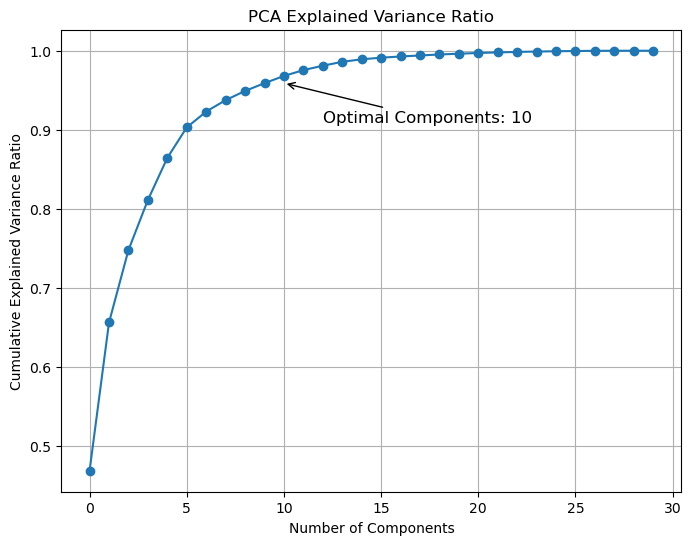

In [26]:
# Standardize the features
x_standardized = (x - x.mean()) / x.std()

# Apply PCA without specifying the number of components
pca = PCA()
pca.fit(x_standardized)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Find the optimal number of components
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')

# Annotate the plot with the optimal number of components
plt.annotate(f'Optimal Components: {optimal_components}', 
             xy=(optimal_components, cumulative_variance_ratio[optimal_components-1]),
             xytext=(optimal_components + 2, cumulative_variance_ratio[optimal_components-1] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.grid(True)
plt.show()

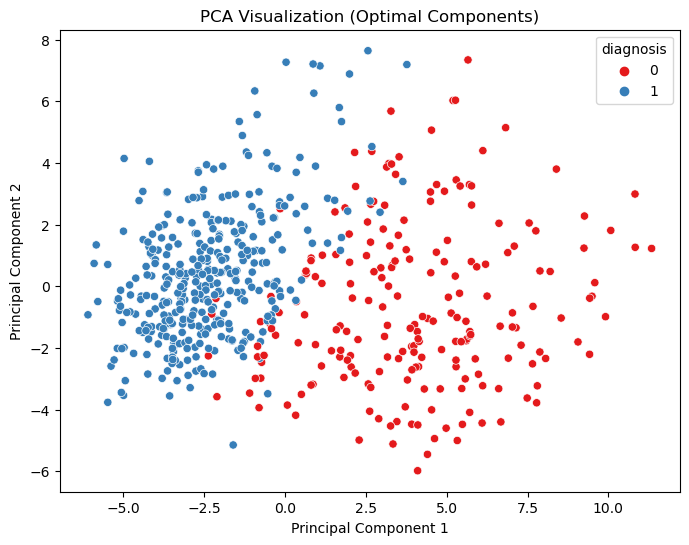

In [27]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(x_standardized)

# Create a DataFrame to hold the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 11)])

# Concatenate principal components with the target variable
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['diagnosis'])], axis=1)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=final_df, palette='Set1')
plt.title('PCA Visualization (Optimal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='diagnosis', loc='upper right')
plt.show()

In [28]:
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.259642,2.277117,-1.749071,-3.300161,-1.185864,1.549217,1.781629,0.122438,0.419178,-0.851943,0
1,2.902707,-4.295082,-0.519038,-1.280112,0.025855,-0.090985,0.967719,-0.522205,0.263083,1.081056,0
2,6.653942,-1.293844,-0.224893,-1.163235,-0.634316,0.658012,-0.135876,-0.285325,-0.217318,0.092123,0
3,5.660276,7.338336,-1.456986,0.029002,-1.058856,0.988762,-0.344918,-0.154015,0.241720,-0.664929,0
4,4.844048,-2.053729,1.541876,-3.599332,0.158692,-1.594611,-0.137556,-1.078062,-0.131097,0.857912,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.610244,-3.320439,2.243161,-1.523067,0.101400,-2.780536,-0.829124,-0.040814,-0.627288,0.635389,0
565,4.537070,-4.007256,3.289241,1.875365,-0.593263,-0.354089,-0.193911,1.158438,0.014439,-0.252670,0
566,1.728019,-2.074816,1.082736,1.726021,2.172669,-0.559311,-0.157201,-0.324784,-0.592249,0.448941,0
567,10.827792,1.262784,-0.338118,2.168687,-0.419111,0.946098,0.610020,0.068075,0.286335,0.416918,0


In [29]:
# Define the features (x) and the output labels (y)
x1 = final_df.drop('diagnosis', axis=1)
y1 = final_df['diagnosis'] 

In [30]:
# Splitting data into train and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=0, stratify=y)

In [31]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_PCA_rf, best_PCA_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, x_train1, y_train1)
print('RF Optimal Hyperparameters: \n', best_PCA_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [32]:
# Evaluate the optimized model on the test data
print(classification_report(y_test1, best_PCA_rf.predict(x_test1)))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.93      0.94      0.94        72

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



## 5.4 Logistic Regression
Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not.

It uses **sigmoid function**, taking input as independent variables and produces a probability value between 0 and 1. The sigmoid function is a mathematical function used to map the predicted values to probabilities. It maps any real value into another value within a range of 0 and 1.

In [ ]:
def create_model(data):
    x = data.drop(['diagnosis'], axis=1)
    y = data['diagnosis']

    # Scaling data
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # splitting data
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=42
    )

    #train
    model_lr = LogisticRegression()
    model_lr.fit(x_train, y_train)

    #test
    y_pred = model_lr.predict(x_test)
    print("Accuracy of our model: ", accuracy_score(y_test, y_pred))
    print("Classification report: \n", classification_report(y_test, y_pred))

    return model_lr, scaler

model_lr, scaler = create_model(df2)

Accuracy of our model:  0.9824561403508771
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Evaluation </p>

In [33]:
y_pred_test1 = best_rf.predict(x_test)
y_pred_test2 = best_svm.predict(x_test)
y_pred_test3 = best_PCA_rf.predict(x_test1)

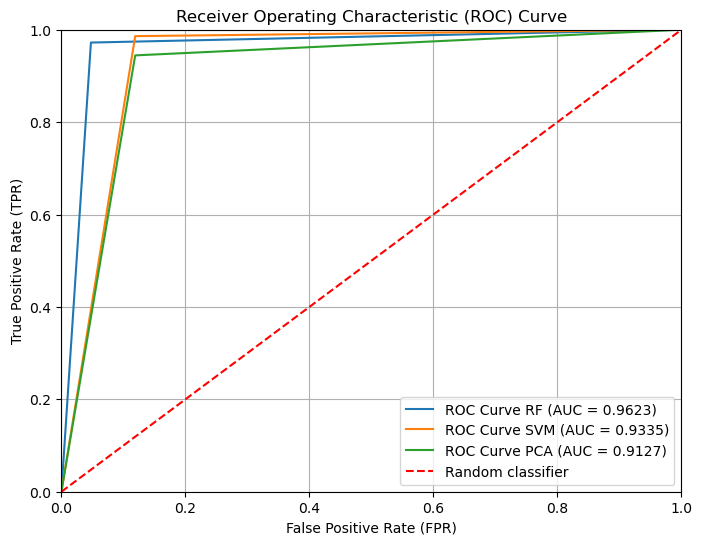

In [34]:
# Calculate ROC curve metrics (fpr, tpr, thresholds)
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_test1)
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_test2)
fpr3, tpr3, thresholds = roc_curve(y_test1, y_pred_test3)

# Calculate AUC score
auc1 = roc_auc_score(y_test, y_pred_test1)
auc2 = roc_auc_score(y_test, y_pred_test2)
auc3 = roc_auc_score(y_test1, y_pred_test3)

# Plot the ROC curve
plt.figure(figsize=(8, 6)) 
plt.plot(fpr1, tpr1, label=f'ROC Curve RF (AUC = {auc1:.4f})') 
plt.plot(fpr2, tpr2, label=f'ROC Curve SVM (AUC = {auc2:.4f})')  
plt.plot(fpr3, tpr3, label=f'ROC Curve PCA (AUC = {auc3:.4f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random classifier')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Save The Model</p>

In [82]:
# Save the classification model by using pickle

with open('Model/breast_cancer_svm.pkl', 'wb') as f:
    pickle.dump(best_svm, f)

In [18]:
# Save the classification model by using pickle

with open('Model/breast_cancer_rf_smote.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

In [ ]:
# Save the classification model by using pickle

with open('Model/breast_cancer_lr.pkl', 'wb') as f:
    pickle.dump(model_lr, f)

<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Conclusion</p>

The machine learning based breast cancer prediction model works well with the Random Forest classifier. The accuracy reached by the model is 97%. The model performs well in identifying whether the breast mass is Benign or Malignant.